<a href="https://colab.research.google.com/github/carlosegn/phishing-detection/blob/main/proyecto2_modelos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO: Proyecto 2 - Modelos de Machine Learning**
## Creado por: Carlos Guerrero

* Fecha creado: 19/04/2023
* Fecha actualización: 22/04/2023
* Descripción: Elección del mejor modelo de Machine Learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
pd.set_option('display.max_columns', None)

## Cargar datos

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/Proyectos/dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


## Limpieza de datos

In [3]:
# Cuántas filas y columnas tiene nuestro base de datos
df.shape

(11430, 89)

**Diccionario de datos**  

| Característica | Tipo | Descripción |
| ----------- | ----------- | ----------- |
| url | object | Dirección del sitio web |
| length_url | int | Longitud de la URL. URLs largas son generalmente usadas para esconder dominios reales |
| length_hostname | int | Longitud del nombre del host |
| ip | object | 0/1 Dirección IP, identifica si el sitio web tiene (1) o no (0)una dirección IP en la URL, la presencia de IPs es considerado un indicador de Phishing |
| nb_dots | int | Número de ocurrencias de punto (.) |
| nb_hyphens | int | Número de ocurrencias de guiones (-) |
| nb_at | int | Número de ocurrencias de arrobas (@) |
| nb_qm | int | Número de ocurrencias de signos de interrogación (?) |
| nb_and | int | Número de ocurrencias de ampersand (&) |
| nb_or | int | Número de ocurrencias de tuberías (\|) |
| nb_eq | int | Número de ocurrencias de signo igual (=) |
| nb\_underscore | int | Número de ocurrencias de subguión  (\_) |
| nb_tilde | int | Número de ocurrencias de comillas (") |
| nb_percent | int | Número de ocurrencias de porcentaje (%) |
| nb_slash | int | Número de ocurrencias de slash (/) |
| nb_star | int | Número de ocurrencias de asteriscos (*) |
| nb_colon | int | Número de ocurrencias de dos puntos (:) |
| nb_comma | int | Número de ocurrencias de comas (,) |
| nb_semicolumn | int | Número de ocurrencias de punto y coma (;) |
| nb_dollar | int | Número de ocurrencias de símbolo de dolar ($) |
| nb_space | int | Número de ocurrencias de espacio (%20) |
| nb_www | int | Número de ocurrencias de www |
| nb_com | int | Número de ocurrencias de .com |
| nb_dslash | int | Número de ocurrencias de doble slash (//) |
| http_in_path | int | Número de ocurrencias de http |
| https_token | object | 0/1 La mayor parte de sitios phishing no proveen ninguna seguridad, por tanto HTTPs es un indicador de un sitio seguro |
| ratio_digits_url | float | Ratio de digitos en la URL. Un alto número de digitos en una URL es un indicador de Phishing |
| ratio_digits_host | float | Ratio de digitos en el nombre de host |
| punycode | object | 0/1 Punycode es utilizado en los nombres de dominio para reemplazar algunos códigos ASCII con caracteres Unicode, su presencia es considerada phishing |
| port | object | 0/1 Indica si la URL tiene o no puerto, la presencia de puertos en la URL es considerada Phishing |
| tld_in_path | object | 0/1 Top Level Domain (TDL) dentro del path, en una URL legítima el TLD sólo debería estar antes del path. El TDL dentro del path es considerado phishing |
| tld_in_subdomain | object | 0/1 Top Level Domain (TDL) dentro del subdominio. El TDL dentro del subdominio es considerado phishing |
| abnormal_subdomain | object | 0/1 URLs que tienen un patrón 'w[w]?[0-9]*' en lugar de www son consideradas phishing |
| nb_subdomains | int | Número subdominios utilizados, las URLs de phishing usan más sudominios |
| prefix_suffix | object | 0/1 Si existen prefijos o sufijos separados con "-" en la URL es considerada phishing |
| random_domain | object | 0/1 Si existen palabras formadas por caracteres aleatorios |
| shortening_service | object | 0/1 Los servicios para encojer URL suelen ser usados para enmascarar direcciones largas, por tanto es considerado como indicador de phishing |
| path_extension | object | 0/1 Presencia de extensiones como 'txt', 'exe', 'js', son indicadores de phishing |
| nb_redirection | int | Número de redirecciones de un sitio web |
| nb_external_redirection | int | Número de redirecciones externas de un sitio web |
| length_words_raw | int | Número de palabras en URL |
| char_repeat | int | Número de repetición de caracteres en URL |
| shortest_words_raw | int | Palabras más cortas en las URL |
| shortest_word_host | int | Palabras más cortas en el nombre de host |
| shortest_word_path | int | Palabras más cortas en paths |
| longest_words_raw | int | Palabras más largas en las URL |
| longest_word_host | int | Palabras más largas en el nombre de host |
| longest_word_path | int | Palabras más largas en paths |
| avg_words_raw | int | Promedio de longitud de palabras en URL |
| avg_word_host | int | Promedio de longitud de palabras en el nombre de host |
| avg_word_path | int | Promedio de longitud de palabras en el path |
| phish_hints | int | Las URL de phishing utilizan palabras confidenciales para ganar confianza en las páginas web visitadas. El número de tales palabras en las URL se considera un indicador de phishing |
| domain_in_brand | object | 0/1 Marca en dominio es considerado legítimo |
|brand_in_subdomain | object | 0/1 Marca en subdominio es considerado phishing |
| brand_in_path | object | 0/1 Marca en path es considerado phishing |
| suspecious_tld | object | 0/1 TLD sospechoso  |
| statistical_report | object | 0/1 Si la IP coincide con un dominio de phishing conocido |
| nb_hyperlinks | int | Número de enlaces, los sitios phishing tienen menos enlaces |
| ratio_intHyperlinks | float | Ratio de hipervínculos internos vs todos los hipervínculos. Hipervínculos internos son usados en páginas legítimas. |
| ratio_extHyperlinks | float | Ratio de hipervínculos externos vs todos los hipervínculos. Hipervínculos externos son usados en páginas phishing. |
| ratio_nullHyperlinks | float | Ratio de hipervínculos nulos vs todos los hipervínculos. Las páginas phishing a veces crean hipervínculos a ningún lado para parecer la página original. |
| nb_extCSS | int | Número de enlaces CSS externos, un alto número es considerado Phishing |
| ratio_intRedirection | int | Ratio de redirecciones internas. Las páginas legítimas usan redirecciones internas. |
| ratio_extRedirection | int | Ratio de redirecciones externas. Las páginas legítimas usan redirecciones externas. |
| ratio_intErrors | float | Ratio de redirecciones internas fallidas. |
| ratio_extErrors | float | Ratio de redirecciones externas fallidas. |
| login_form | object | 0/1 Formularios de login con enlaces de acción externos o acciones vacías son considerados phishing |
| external_favicon | object | 0/1 Si un sitio usa un favicon externo para simular un sitio se considera phishing |
| links_in_tags | float | Ratio de etiquetas \<Link\> apuntando a páginas en el mismo dominio |
| submit_email | object | 0/1 Si un formulario tiene como acción el envío de un correo es considerado Phishing |
| ratio_intMedia | float | Ratio de medios (imágenes, audio, video) guardados en el mismo dominio. Cuando es en el mismo dominio se considera legítimo |
| ratio_extMedia | float | Ratio de medios (imágenes, audio, video) guardados en dominios externos. |
| sfh | object | 0/1 Si una acción en un formulario es una cadena vacía o about:blank se considera Phishing |
| iframe | object | 0/1 El uso de frames invisibles es considerado Phishing |
| popup_window | object | 0/1 La presencia de una ventana emergente con campos de texto es considerado Phishing. |
| safe_anchor | int | Número de etiquetas \<a\> inseguras (#, javascript, mailto) |
| onmouseover | object | 0/1 Presencia del método 'onmouseover' es un indicador de phishing |
| right_clic | object | 0/1 Presencia del método 'onmouseover' con la acción 'event.button==2' para deshabilitar el click derecho, es un indicador de phishing |
| empty_title | object | 0/1 Un título vació es indicador de phishing |
| domain_in_title | object | 0/1 Si el dominio y el título de la página coinciden se considera un sitio legítimo |
| domain_with_copyright | object | La presencia del dominio de URL dentro del logotipo de derechos de autor es un indicador de legitimidad. |
| whois_registered_domain | object | 0/1 Dominios sin un WHOIS registrado son considerados Phishing. |
| domain_registration_length | int | Número de años que fue pagada la renovación del dominio. |
| domain_age | int | Número de años que tiene el dominio. |
| web_traffic | int | Cantidad de visitantes (tráfico), los sitios phishing tienen poco tráfico. |
| dns_record | object | 0/1 Una falta de registro DNS es un indicador de phishing. |
| google_index | object | 0/1 Páginas no indexadas en Google son consideradas como phishing. |
| page_rank | int | El ranking de la página web, un ranking bajo es indicador de phishing. |
| status | object | Valores: phishing / legitimate. Variable objetivo, indica si la página es phishing o legítima. |

Fuente: https://arxiv.org/pdf/2010.12847.pdf

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
df.isna().sum().value_counts()

0    89
dtype: int64

No existen valores nulos en la base de datos.

In [6]:
df.duplicated().sum()

0

No existen registros duplicados.

De acuerdo al diccionario de datos existen varias variables categóricas que al momento se encuentran como enteros, se debe realizar el cambio a objeto de dichas variables.

In [7]:
# Cambiar todas las variables categóricas a objeto
df[['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']] = df[['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']].astype(object)

In [8]:
# Codificar variable objetivo "status", lo que deseamos predecir es si el sitio web es Phishing por lo tanto phishing=1 y legitimate=0
df['status'] = df['status'].replace({'phishing': 1, 'legitimate': 0})

In [9]:
# Observar el balance de nuestra variable objetivo
df['status'].value_counts(normalize=True)

0    0.5
1    0.5
Name: status, dtype: float64

In [10]:
df.nb_or.value_counts()

0    11430
Name: nb_or, dtype: int64

In [11]:
df.ratio_nullHyperlinks.value_counts()

0    11430
Name: ratio_nullHyperlinks, dtype: int64

In [12]:
df.ratio_intRedirection.value_counts()

0    11430
Name: ratio_intRedirection, dtype: int64

In [13]:
df.ratio_intErrors.value_counts()

0    11430
Name: ratio_intErrors, dtype: int64

Las variables anteriores sólo tienen el valor 0, por lo que no aportarían a nuestro modelo, se eliminará dichas variables.

In [14]:
df.drop(columns=['nb_or', 'ratio_nullHyperlinks', 'ratio_intRedirection', 'ratio_intErrors'], inplace=True)

Verificar variables categóricas

La variable statistical_report tiene valores 0, 1 y 2, sin embargo, según el diccionario de datos sólo debería tener los valores 1 que indica que la dirección IP corresponde a un dominio de phishing registrado y 0 que no corresponde. Voy a revisar si los valores de 2 corresponden o dominios de Phishing o Legítimos.

In [15]:
# Confirmar si los valores 2 corresponden a phishing
df.loc[(df['statistical_report'] == 2),  'status'].value_counts()

1    278
0     28
Name: status, dtype: int64

In [16]:
# Confirmar si los valores 0 y 1 corresponden sólo a sitios legítimos y a phishing respectivamente.
df.loc[(df['statistical_report'] == 0),  'status'].value_counts()

0    5674
1    5379
Name: status, dtype: int64

In [17]:
df.loc[(df['statistical_report'] == 1),  'status'].value_counts()

1    58
0    13
Name: status, dtype: int64

Podemos observar que tanto los valores de 0 y 1 representan sitios phishing como legítimos, por tanto imputaré la moda (valor que más se repite) al valor 2.

In [18]:
df['statistical_report'].mode()

0    0
Name: statistical_report, dtype: object

In [19]:
df['statistical_report'] = df['statistical_report'].replace({2: 0})
df['statistical_report'].value_counts()

0    11359
1       71
Name: statistical_report, dtype: int64

La limpieza de la base de datos concluye.

## Modelos de Machine Learning

### Preprocesamiento

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  object 
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [21]:
# Separamos los datos en la matriz de características y el vector objetivo
# El vector objetivo es "status"
y = df['status']

# En la matriz de características incluiremos todas las columnas excepto la URL, status (el objetivo), domain_registration_length y domain_age
# estas últimas columnas tienen valores que no parecen ser reales (miles de años)
X = df.drop(columns=['url', 'status', 'domain_registration_length', 'domain_age'])

In [22]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0.875000,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0.000000,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,0,0,1,2
2,126,50,1,4,1,0,1,2,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0.000000,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0.250000,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0.537037,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,8725,0,0,6


In [23]:
X.shape

(11430, 81)

Todas las variables tipo objeto ya se encuentran codificadas (todas son binarias), para el preprocesamiento sólo escalaré las variables numéricas.

In [24]:
# Creo un selector para las variables numéricas
num_selector = make_column_selector(dtype_include='number')

# Selecciono solo las variables numéricas
num_cols = num_selector(X)
num_cols

['length_url',
 'length_hostname',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_underscore',
 'nb_tilde',
 'nb_percent',
 'nb_slash',
 'nb_star',
 'nb_colon',
 'nb_comma',
 'nb_semicolumn',
 'nb_dollar',
 'nb_space',
 'nb_www',
 'nb_com',
 'nb_dslash',
 'http_in_path',
 'ratio_digits_url',
 'ratio_digits_host',
 'nb_subdomains',
 'nb_redirection',
 'nb_external_redirection',
 'length_words_raw',
 'char_repeat',
 'shortest_words_raw',
 'shortest_word_host',
 'shortest_word_path',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extHyperlinks',
 'nb_extCSS',
 'ratio_extRedirection',
 'ratio_extErrors',
 'links_in_tags',
 'ratio_intMedia',
 'ratio_extMedia',
 'safe_anchor',
 'web_traffic',
 'page_rank']

In [25]:
# Instanciar el scaler
scaler = StandardScaler()

# Adjustamos y transformamos sólo las variables numéricas en nuestro DataFrame
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,web_traffic,dns_record,google_index,page_rank
0,-0.436327,-0.193964,0,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,-0.081815,-0.083946,-0.685161,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,1.098907,-0.337729,-0.081271,-0.098673,1,-0.594651,-0.267868,0,0,0,0,0,1.206090,0,0,0,0,-0.720143,-0.05621,-0.400711,0.224909,-0.057562,-0.512450,0.200505,-0.198974,0.107876,-0.197666,-0.363968,-0.189497,-0.082894,-0.388973,0,0,0,0,-0.07906,-0.420926,-0.194034,0.605943,-0.284507,2.687711,2.801064,0,0,0.674877,0,1.235290,-0.605350,0,0,0,-0.948614,0,0,0,0,1,0,-0.429340,1,1,0.320974
1,0.287067,0.177207,1,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,-0.081815,-0.083946,0.377443,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,-0.893559,-0.337729,-0.081271,-0.098673,1,1.876053,-0.267868,0,0,0,0,0,-1.933425,0,0,0,0,0.725201,-0.05621,-0.400711,0.224909,-0.509749,3.547014,-0.133086,0.751998,1.730002,0.929003,2.048202,3.164071,1.339666,-0.388973,0,0,0,0,-0.07906,-0.342965,0.967464,-0.760717,-0.284507,-0.596511,-0.399922,0,0,1.156557,0,0.802838,-0.084312,0,0,0,1.610785,0,0,0,1,0,0,-0.429340,0,1,-0.467407
2,1.173224,2.682613,1,1.109242,0.001174,-0.142915,2.356473,2.237556,2.711505,1.534217,-0.081815,-0.083946,0.377443,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,-0.893559,2.300854,-0.081271,-0.098673,0,1.092856,-0.267868,0,0,0,1,0,1.206090,1,0,0,0,0.725201,-0.05621,1.035010,-0.194490,-0.509749,-0.512450,-0.133086,0.072732,0.513407,0.279002,0.239075,0.201752,0.426829,-0.388973,0,0,0,0,-0.07906,-0.498886,1.056008,-0.864902,-0.284507,-0.596511,-0.399922,0,0,1.156557,0,-0.926971,-0.605350,0,0,0,1.610785,0,0,0,1,0,0,2.491612,0,1,-1.255788
3,-0.779940,-0.936306,0,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,-0.081815,-0.083946,-1.216463,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,-0.893559,-0.337729,-0.081271,-0.098673,1,-0.594651,-0.267868,0,0,0,0,0,-0.363667,0,0,0,0,0.725201,-0.05621,-0.939107,-0.613890,0.846812,-0.005017,-0.800270,-0.470680,-1.108719,-0.457666,-0.544881,-0.748425,-0.712552,-0.388973,0,0,0,0,-0.07906,0.370674,0.984697,-0.780995,-0.284507,0.341838,1.200571,0,0,1.156557,0,1.158067,-0.512307,0,0,0,0.651011,0,0,0,1,0,0,-0.375359,0,0,-0.073217
4,-0.110800,-0.565135,0,-0.351010,0.480332,-0.142915,-0.387464,-0.197604,-0.293683,-0.295128,-0.081815,-0.083946,0.377443,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,1.098907,-0.337729,-0.081271,-0.098673,1,-0.594651,-0.267868,0,0,0,0,0,-0.363667,0,0,0,0,0.725201,-0.05621,-0.041781,0.015209,-0.057562,-0.512450,0.534097,-0.198974,-0.703187,0.019001,-0.223258,-0.748425,0.266916,-0.388973,0,0,0,0,-0.07906,0.088816,-0.350289,0.789798,-0.284507,1.419202,-0.281367,1,0,0.589875,0,-0.926971,1.999841,0,0,0,-0.948614,0,0,0,0,1,0,-0.424968,0,0,1.109355


In [26]:
# Train test split con stratify para dividir los datos de prueba con la misma proporción que los datos originales y una mayor proporción de datos de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = .3, stratify = y)

In [27]:
y_train.value_counts(normalize=True)

1    0.500062
0    0.499938
Name: status, dtype: float64

In [28]:
y_test.value_counts(normalize=True)

0    0.500146
1    0.499854
Name: status, dtype: float64

### Modelo de regresión logística con GridSearch

In [29]:
# Usar Gridsearch para encontrar los mejores hiperparámetros para este modelo
# definimos los parámetros que deseamos probar
params = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'multi_class': ['auto', 'ovr']}

In [30]:
# Instanciamos Regresión Logística
log_reg = LogisticRegression(solver = 'liblinear', random_state=0)

# Gridsearch para buscar los mejores hiperparámetros con un crossvalidation de 5
gs = GridSearchCV(log_reg, params, cv = 5)

# Ajustamos el modelo a los datos de entrenamiento
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'multi_class': ['auto', 'ovr'],
                         'penalty': ['l1', 'l2']})

In [31]:
# Observamos los hiperparámetros escogidos por GridSearch
gs.best_params_

{'C': 10, 'class_weight': 'balanced', 'multi_class': 'auto', 'penalty': 'l1'}

#### Métricas del modelo de regresión logística

In [32]:
# Vemos la exactitud del modelo con los parámetros escogidos por GridSearch
print("Exactitud en el conjunto de entrenamiento: ", gs.score(X_train, y_train))
print("Exactitud en el conjunto de prueba: ", gs.score(X_test, y_test))

Exactitud en el conjunto de entrenamiento:  0.9492563429571304
Exactitud en el conjunto de prueba:  0.9419655876348789


In [33]:
# Observamos el tiempo que toma al modelo realizar las predicciones del conjunto de prueba
%%time
y_pred = gs.predict(X_test)

CPU times: user 34.4 ms, sys: 29.2 ms, total: 63.6 ms
Wall time: 35.1 ms


Al modelo le toma 49.6 milisegundos realizar las predicciones.

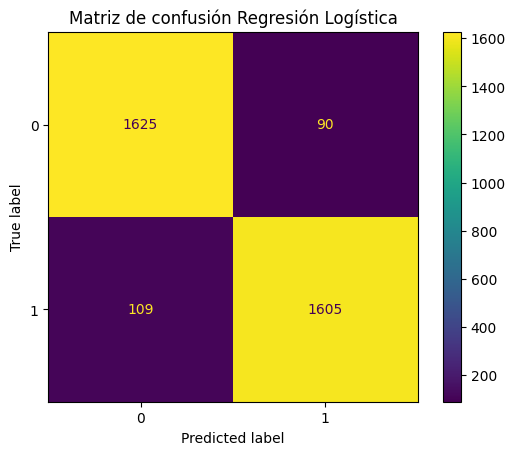

In [34]:
# Matriz de confusión para el modelo de regresión logística con hiperparámetros escogidos
cm_gs = confusion_matrix(y_test, y_pred, labels=gs.classes_)
cmdisp_gs = ConfusionMatrixDisplay(confusion_matrix=cm_gs, display_labels=gs.classes_)
cmdisp_gs.plot()
plt.title('Matriz de confusión Regresión Logística')
plt.show()

Observamos que el modelo tiene un buen rendimiento y los Falsos Negativos son menores que los Falsos Positivos.

In [35]:
# Imprimir reporte de clasificación del modelo de regresión logística
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1715
           1       0.95      0.94      0.94      1714

    accuracy                           0.94      3429
   macro avg       0.94      0.94      0.94      3429
weighted avg       0.94      0.94      0.94      3429



En este modelo nos interesa predecir los sitios web Phishing (1), por lo que la métrica de mayor importancia es la Sensibilidad (recall), ya que nos interesa evitar los falsos negativos, es decir que una página Phishing sea detectada como Legítima.

En el modelo de Regresión Logística nuestra sensibilidad es del **94%**

In [36]:
# Calcular los coeficientes de odd de las variables más representativas del modelo
# Obtenemos el mejor modelo de regresión logística que obtuvo GridSearch
logreg_best = gs.best_estimator_

# Obtenemos los coeficientes de dicho modelo y los transformamos a coeficientes de odd
coeficientes = np.exp(logreg_best.coef_)

# Guardamos los nombres de las columnas en una variable
caracteristicas = X.columns

# Creamos un DataFrame con los coeficientes
coef_df = pd.DataFrame({'Caracteristicas': caracteristicas, 'coef_odd': coeficientes[0]})

# Ordenamos los valores
coef_df = coef_df.reindex(coef_df['coef_odd'].abs().sort_values(ascending=False).index)

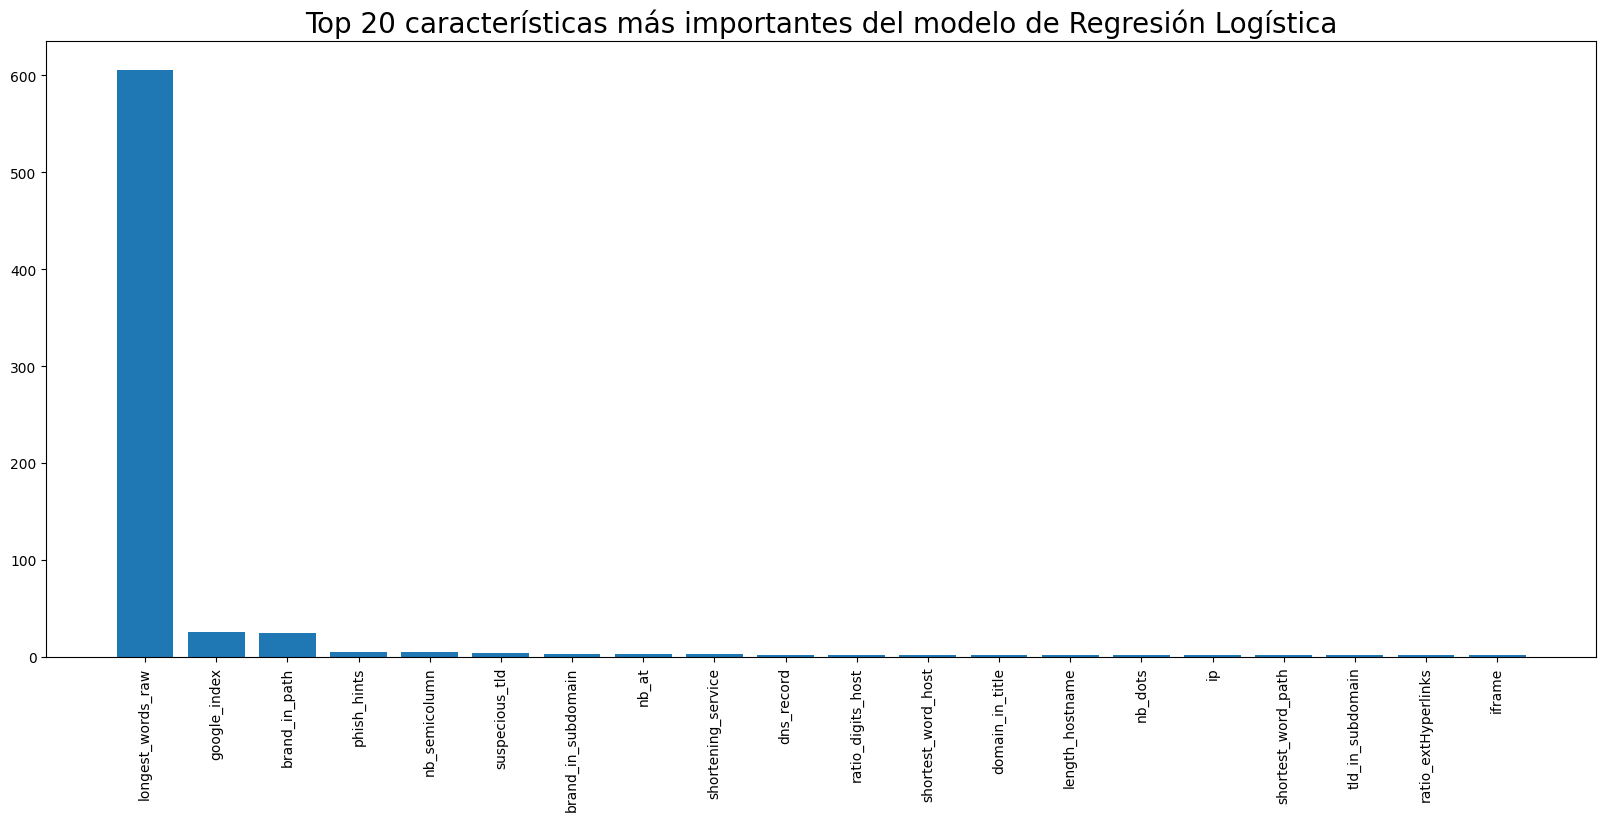

In [37]:
# Observar un gráfico de las 20 características más importantes
plt.figure(figsize=(20,8))
plt.bar(coef_df['Caracteristicas'].head(20), coef_df['coef_odd'].head(20))
plt.xticks(rotation=90)
plt.title('Top 20 características más importantes del modelo de Regresión Logística', fontsize=20)
plt.show()

Observamos las características más importantes que ayudan a nuestro modelo a predecir si una página es Phishing, se destacan las características longest_words_raw (Palábras más largas en la URL), google_index (Si la página está o no indexada en Google) y brand_in_path (Si la marca está dentro del path, es decir, luego del dominio.)

### Modelo Random Forest

In [38]:
# Instanciar el modelo
rf = RandomForestClassifier(random_state=0)

In [39]:
# Ajustar el modelo de datos con los datos de entrenamiento
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [40]:
# Evaluar el rendimiento del modelo
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Exactitud en el conjunto de entrenamiento: ', rf_train_score)
print('Exactitud en el conjunto de prueba: ', rf_test_score)

Exactitud en el conjunto de entrenamiento:  1.0
Exactitud en el conjunto de prueba:  0.9641294838145232


Observamos que con el modelo por defecto se obtiene una mejor métrica de exactitud que con Regresión Logística, tanto en conjunto de datos de entrenamiento como de prueba.

In [41]:
# Observamos los parámetros por defecto
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [42]:
# Probaremos varios valores de n_estimators
# Lista de valores a probar n_estimators:
max_estimators = list(range(1, 100))

# Lista para almacenar la puntuación para cada valor de n_estimators:
rf_score = []
for estimator in max_estimators:
    rf2 = RandomForestClassifier(n_estimators = estimator, random_state = 0)
    rf2.fit(X_train, y_train)
    score = rf2.score(X_test, y_test)
    rf_score.append(score)

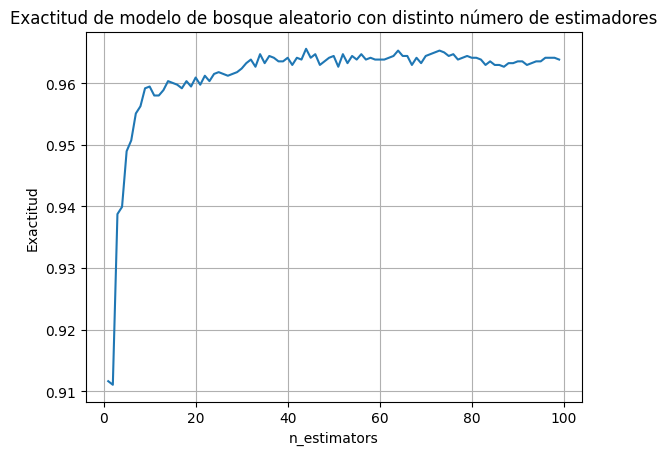

In [43]:
# Observamos la exactitud del modelo para distintos valores de n_estimators
plt.plot(max_estimators, rf_score)
plt.title('Exactitud de modelo de bosque aleatorio con distinto número de estimadores')
plt.xlabel('n_estimators')
plt.ylabel('Exactitud')
plt.grid()
plt.show()

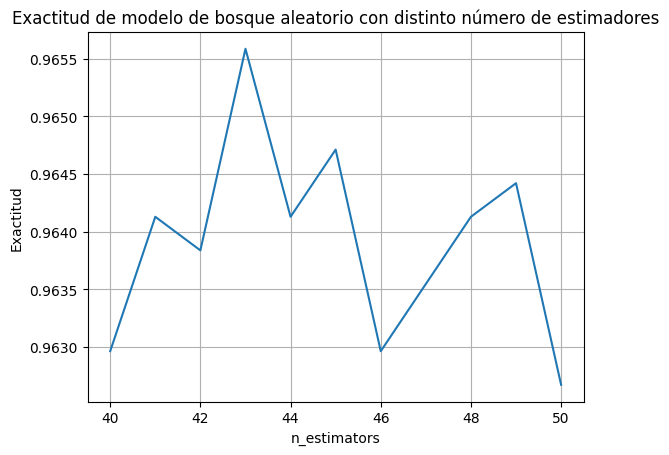

In [44]:
# Mostrar los valores sólo entre los n_estimators 40 y 50
plt.plot(list(range(40,51)), rf_score[40:51])
plt.title('Exactitud de modelo de bosque aleatorio con distinto número de estimadores')
plt.xlabel('n_estimators')
plt.ylabel('Exactitud')
plt.grid()
plt.show()

In [45]:
# Confirmamos cuál es el valor máximo de score
np.array(rf_score).max()

0.9655876348789735

In [46]:
rf_score[43]

0.9655876348789735

Observamos que el valor máximo de score se encuentra en la posición 43, teniendo en cuenta que el índice de la lista rf_score comienza en 0, eso nos da un valor de 44 n_estimators

In [47]:
# Instanciar el modelo con 44 n_estimators
rf44 = RandomForestClassifier(n_estimators=44, random_state=0)

In [48]:
# Ajustar el modelo de datos con los datos de entrenamiento
rf44.fit(X_train, y_train)

RandomForestClassifier(n_estimators=44, random_state=0)

#### Métricas del modelo de Random Forest

In [49]:
# Exactitud con el modelo escogido
rf44_train_score = rf44.score(X_train, y_train)
rf44_test_score = rf44.score(X_test, y_test)
print('Exactitud en el conjunto de entrenamiento: ', rf44_train_score)
print('Exactitud en el conjunto de prueba: ', rf44_test_score)

Exactitud en el conjunto de entrenamiento:  0.9997500312460942
Exactitud en el conjunto de prueba:  0.9655876348789735


Observamos que en cuanto a exactitud en el modelo de prueba el modelo de Random Forest es ligeramente superior **(96.6%)** al modelo de Regresión Logística en donde se obtuvo **94.2%**

In [50]:
# Observamos el tiempo que toma al modelo realizar las predicciones del conjunto de prueba
%%time
y_pred_rf = rf44.predict(X_test)

CPU times: user 52.4 ms, sys: 46 µs, total: 52.4 ms
Wall time: 53.9 ms


Al modelo le toma 296ms, tiempo superior que al modelo de Regresión Logística.

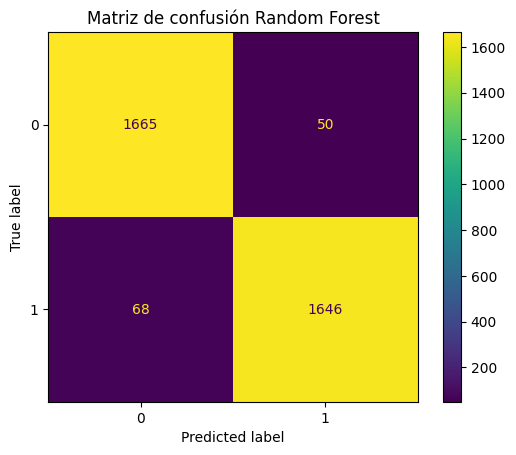

In [51]:
## Matriz de confusión para el modelo de Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf44.classes_)
cmdisp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf44.classes_)
cmdisp_rf.plot()
plt.title('Matriz de confusión Random Forest')
plt.show()

Observamos que el modelo tiene un buen rendimiento y los Falsos Negativos son menores que los Falsos Positivos. Y supera el modelo de regresión logística en donde los FN eran 90.

In [52]:
# Imprimir reporte de clasificación del modelo de random forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1715
           1       0.97      0.96      0.97      1714

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



En el modelo de Random Forest nuestra sensibilidad es del **96%**

In [53]:
# Obtenemos la importancia de las características en el modelo Random Forest
importancia = rf44.feature_importances_

# Creamos un DataFrame con la importancia
imprf_df = pd.DataFrame({'Caracteristicas': caracteristicas, 'Importancia': importancia})

# Ordenamos los valores
imprf_df = imprf_df.reindex(imprf_df['Importancia'].abs().sort_values(ascending=False).index)

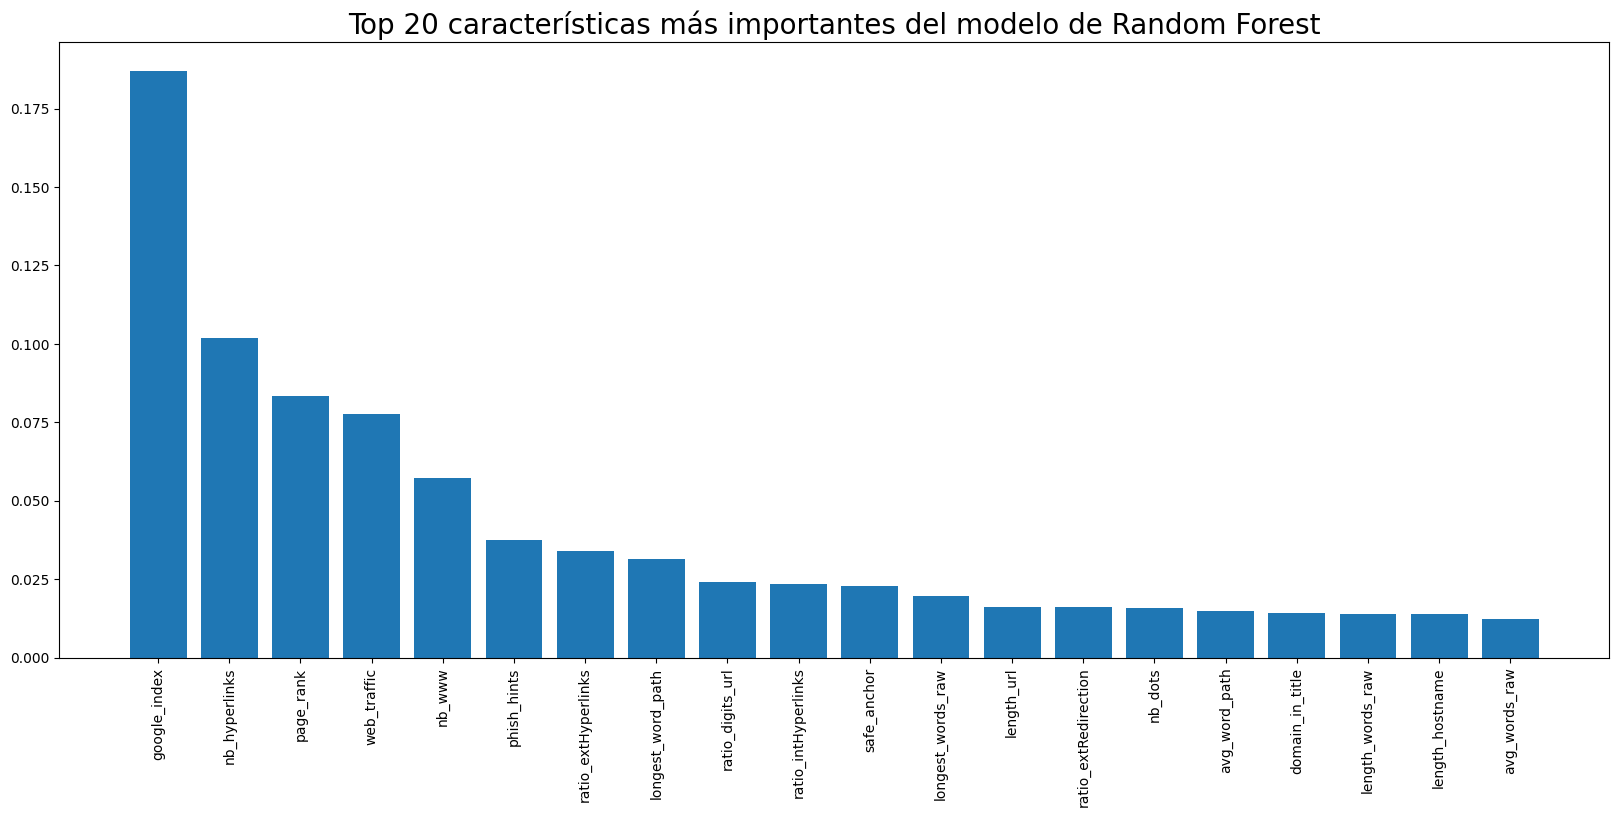

In [54]:
# Observar un gráfico de las 20 características más importantes
plt.figure(figsize=(20,8))
plt.bar(imprf_df['Caracteristicas'].head(20), imprf_df['Importancia'].head(20))
plt.xticks(rotation=90)
plt.title('Top 20 características más importantes del modelo de Random Forest', fontsize=20)
plt.show()

Observamos que en el modelo de Random Forest existe una mayor variedad de características consideradas importantes, entre las que destacan: google_index (si la página se encuentra o no en el índice de Google), nb_hyperlinks (número de enlaces), page_rank (el ranking de la página web), web_traffic (el tráfico de la página) y nb_www (número de ocurrencias de la palabra www).

Creo que este modelo tiene en cuenta muchas más características de importancia para poder determinar si una página es Phishing.

### Modelo XGBoost

In [55]:
# El modelo XGBoost necesita que los tipos de datos sean enteros y booleanos, en vista de que todas las características
X_train_xgb = X_train
X_test_xgb = X_test
X_train_xgb[['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']] = X_train_xgb[['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']].astype(bool)
X_test_xgb[['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']] = X_test_xgb[['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'login_form', 'external_favicon', 'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover', 'right_clic', 'empty_title', 'domain_in_title', 'domain_with_copyright', 'whois_registered_domain', 'dns_record', 'google_index']].astype(bool)

In [56]:
# Instanciamos el modelo
xgb = XGBClassifier(random_state=0)

In [57]:
# Ajustamos el modelo a los datos de entrenamiento
xgb.fit(X_train_xgb, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [58]:
# Evaluar la exactitud del modelo
print('Exactitud en el conjunto de entrenamiento: ', xgb.score(X_train_xgb, y_train))
print('Exactitud en el conjunto de prueba: ', xgb.score(X_test_xgb, y_test))

Exactitud en el conjunto de entrenamiento:  1.0
Exactitud en el conjunto de prueba:  0.9650043744531933


In [59]:
# Probaremos varios valores de n_estimators
# Lista de valores a probar n_estimators:
max_estimators_xgb = list(range(1, 100))

# Lista para almacenar la puntuación para cada valor de n_estimators:
xgb_score = []
for estimator in max_estimators_xgb:
    xgb2 = XGBClassifier(n_estimators = estimator, random_state=0)
    xgb2.fit(X_train_xgb, y_train)
    score = xgb2.score(X_test_xgb, y_test)
    xgb_score.append(score)

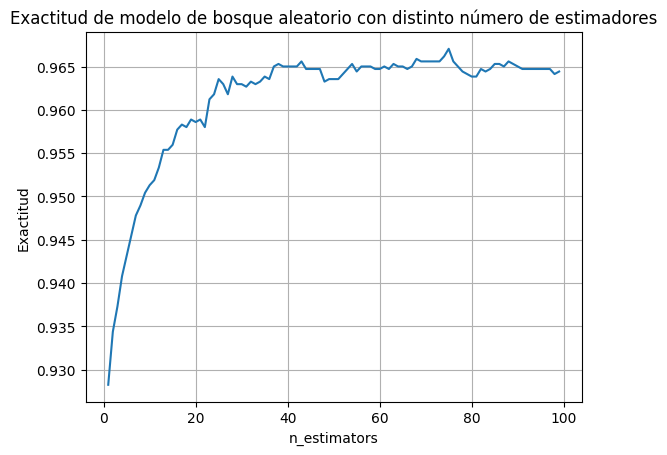

In [60]:
# Observamos la exactitud del modelo para distintos valores de n_estimators
plt.plot(max_estimators_xgb, xgb_score)
plt.title('Exactitud de modelo de bosque aleatorio con distinto número de estimadores')
plt.xlabel('n_estimators')
plt.ylabel('Exactitud')
plt.grid()
plt.show()

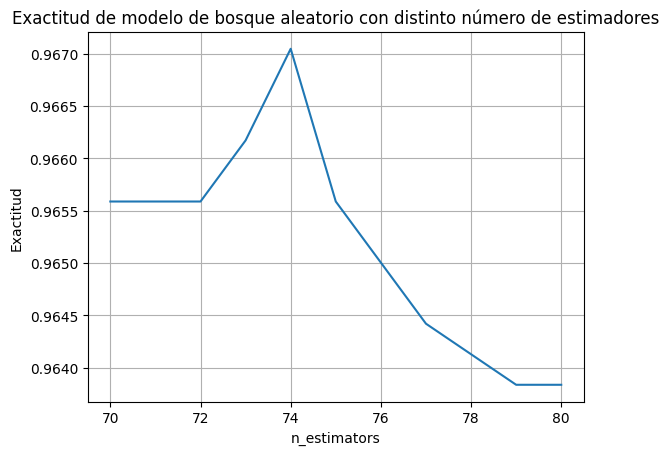

In [61]:
# Mostrar los valores sólo entre los n_estimators 70 y 80
plt.plot(list(range(70,81)), xgb_score[70:81])
plt.title('Exactitud de modelo de bosque aleatorio con distinto número de estimadores')
plt.xlabel('n_estimators')
plt.ylabel('Exactitud')
plt.grid()
plt.show()

Observamos que el valor máximo de score se encuentra en la posición 74, teniendo en cuenta que el índice de la lista xgb_score comienza en 0, eso nos da un valor de 75 n_estimators

In [62]:
# Instanciamos el modelo con 75 n_estimators
xgb75 = XGBClassifier(n_estimators=75, random_state=0)

In [63]:
# Ajustamos el modelo a los datos de entrenamiento
xgb75.fit(X_train_xgb, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=75, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

#### Métricas del modelo XGBoost

In [64]:
# Exactitud con el modelo escogido
xgb75_train_score = xgb75.score(X_train_xgb, y_train)
xgb75_test_score = xgb75.score(X_test_xgb, y_test)
print('Exactitud en el conjunto de entrenamiento: ', xgb75_train_score)
print('Exactitud en el conjunto de prueba: ', xgb75_test_score)

Exactitud en el conjunto de entrenamiento:  1.0
Exactitud en el conjunto de prueba:  0.9670457859434237


Observamos que la exactitud del modelo es del **96.7%**, superior a los dos modelos anteriores.

In [65]:
# Observamos el tiempo que toma al modelo realizar las predicciones del conjunto de prueba
%%time
y_pred_xgb = xgb75.predict(X_test)

CPU times: user 50.4 ms, sys: 978 µs, total: 51.4 ms
Wall time: 34.2 ms


Al modelo le toma 66.5 ms realizar las predicciones, más rápido que Random Forest y un poco más lento que la regresión logística.

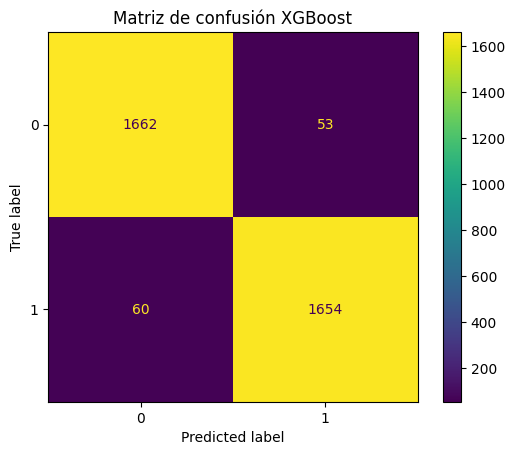

In [66]:
## Matriz de confusión para el modelo XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xgb75.classes_)
cmdisp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb75.classes_)
cmdisp_xgb.plot()
plt.title('Matriz de confusión XGBoost')
plt.show()

Observamos que la predicción de Falsos Negativos es un poco inferior al modelo de Random Forest, es decir se están prediciendo más Falsos Negativos.

In [67]:
# Imprimir reporte de clasificación del modelo de XGBoost
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1715
           1       0.97      0.96      0.97      1714

    accuracy                           0.97      3429
   macro avg       0.97      0.97      0.97      3429
weighted avg       0.97      0.97      0.97      3429



En el modelo de XGBoost nuestra sensibilidad es del **96%**, similar a Random Forest y superior a Regresión Logística

In [68]:
# Obtenemos la importancia de las características en el modelo Random Forest
importancia_xgb = xgb75.feature_importances_

# Creamos un DataFrame con la importancia
impxgb_df = pd.DataFrame({'Caracteristicas': caracteristicas, 'Importancia': importancia_xgb})

# Ordenamos los valores
impxgb_df = impxgb_df.reindex(impxgb_df['Importancia'].abs().sort_values(ascending=False).index)

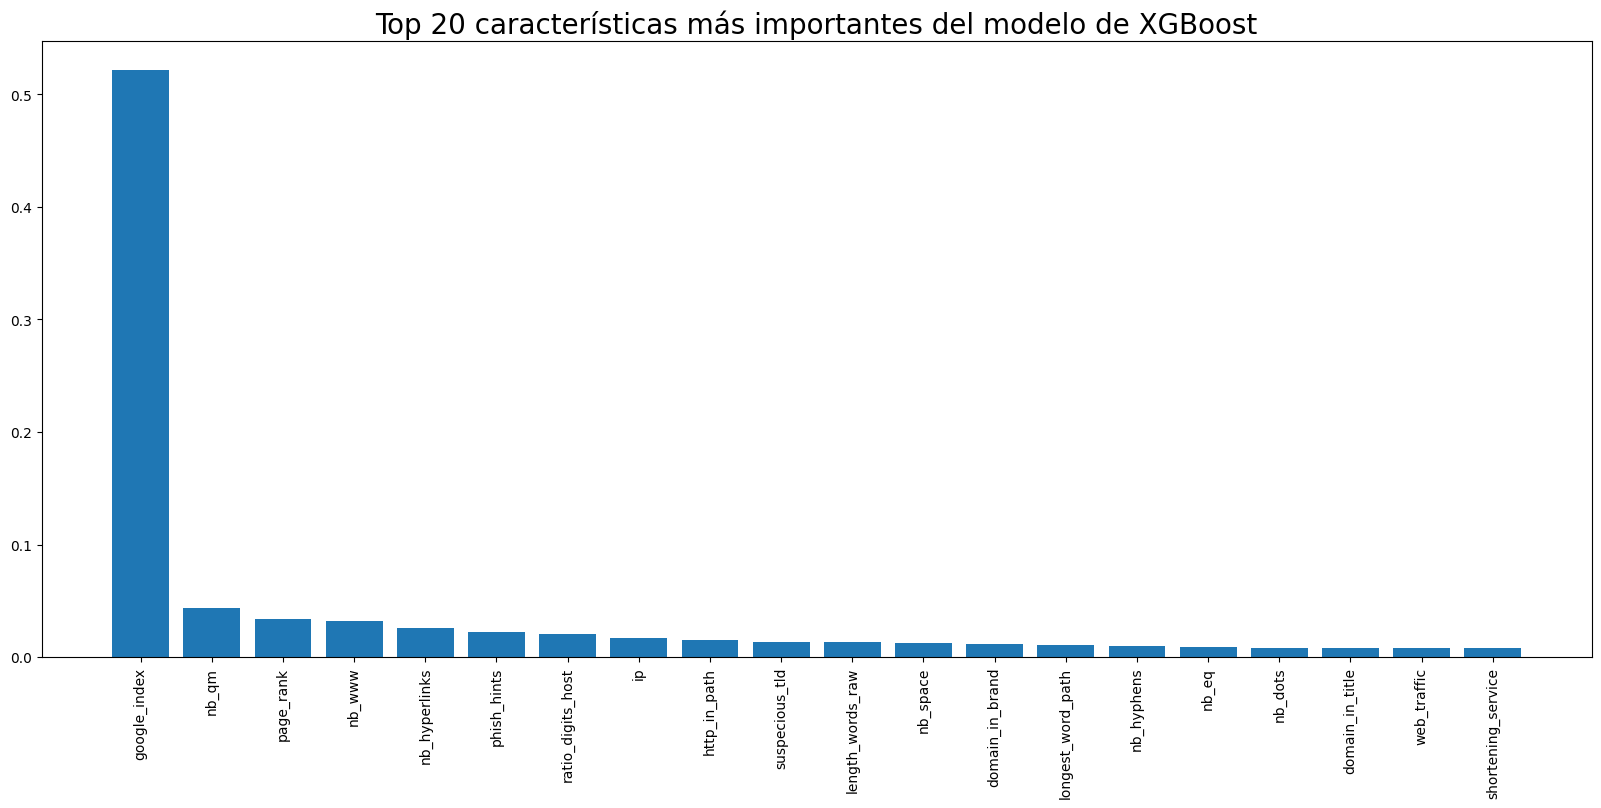

In [69]:
# Observar un gráfico de las 20 características más importantes
plt.figure(figsize=(20,8))
plt.bar(impxgb_df['Caracteristicas'].head(20), impxgb_df['Importancia'].head(20))
plt.xticks(rotation=90)
plt.title('Top 20 características más importantes del modelo de XGBoost', fontsize=20)
plt.show()

Observamos que en el modelo con XGBoost la característica google_index contribuye el 50% en la explicación del vector objetivo, es decir, en predecir si una página web es Phishing, y el resto de características tienen una contribución de menos del 10% cada una.

## Modelo escogido

El modelo escogido es **Random Forest**, si bien es cierto el modelo de XGBoost tienen una métrica de exactitud ligeramente mayor (96.7% vs 96.6%), la métrica de sensibilidad, que es la que más nos interesa para este modelo es igual en los dos modelos (96%) y en el modelo de Random Forest la predicción de los falsos negativos es mejor (menos FN que XGBoost).  

Además, en el modelo de Random Forest la importancia de las características para predecir el objetivo es mucho más real, la más importante aporta un 18% en la predicción, lo que nos permite eligir varias características para nuestro análisis y recomendación a áreas de Seguridad Lógica para la detección eficiente de páginas Phishing.

En el modelo XGBoost una sola variable aporta el 50% de la predicción lo que en la práctica afectaría una detección eficiente.